In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import the csv file
df = pd.read_csv("C:/Users/Tamanna Rana/Downloads/archive (12)/train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
# general overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
# calculation no. of nulls
null_count = df['Postal Code'].isnull().sum()
print(null_count)

11


In [6]:
# filling 0 to the empty column
df['Postal Code'].fillna(0, inplace=True)

C:\Users\Tamanna Rana\AppData\Local\Temp\ipykernel_1108\2596855935.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(0, inplace=True)


In [7]:
# changing a float to integer
df['Postal Code'] = df['Postal Code'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int32  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [8]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


DATA CLEANING 

CHECKING FOR DUPLICATES

In [10]:
# using conditional statements
if df.duplicated().sum() > 0:
   print('Duplicates are present')
else:
   print('No duplicate exist')

No duplicate exist


In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9795    False
9796    False
9797    False
9798    False
9799    False
Length: 9800, dtype: bool

In [12]:
df.duplicated(keep=False).sum()

0

EXPLORATORY DATA ANALYSIS

CUSTOMER ANALYSIS

CUSTOMER SEGMENTATION

In [13]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [15]:
# types of customers
types_of_customers = df['Segment'].unique()
print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [16]:
# number of customers in each segment
number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns={'index': 'customer type', 'segment': 'total customers'})
print(number_of_customers)

       Segment  count
0     Consumer   5101
1    Corporate   2953
2  Home Office   1746


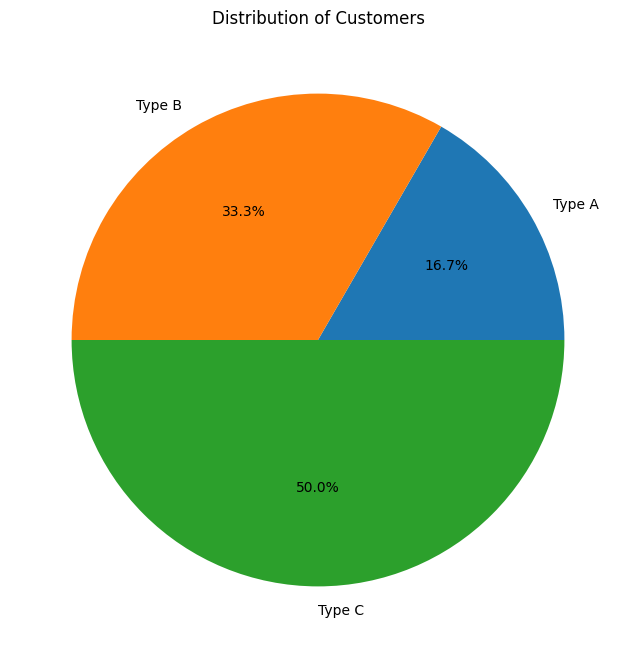

In [19]:
# plotting a pie chart
number_of_customers = pd.DataFrame({'Total Customers': [100, 200, 300], 'customer type': ['Type A', 'Type B', 'Type C']})
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(number_of_customers['Total Customers'], labels=number_of_customers['customer type'], autopct='%1.1f%%')

#set a pie chart labels
plt.title('Distribution of Customers')
plt.show()

CUSTOMER AND SALES

In [21]:
sales_per_category = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_category = sales_per_category.rename(columns={'Segment': 'customer type', 'sales': 'total sales'})
print(sales_per_category)

  customer type         Sales
0      Consumer  1.148061e+06
1     Corporate  6.884941e+05
2   Home Office  4.249822e+05


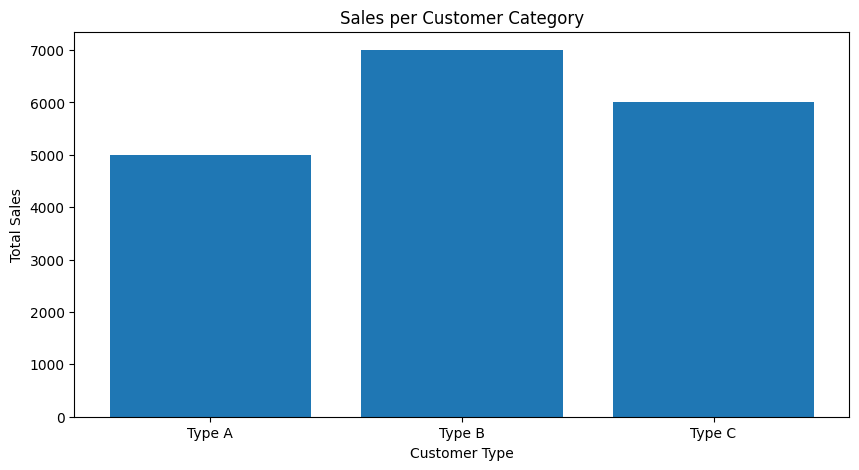

In [26]:
# plotting the bar graph
sales_per_category = pd.DataFrame({'customer type': ['Type A', 'Type B', 'Type C'], 'Total sales': [5000, 7000, 6000]})
plt.figure(figsize=(10, 5))  
plt.bar(sales_per_category['customer type'], sales_per_category['Total sales'])

# add labels and titles
plt.title('Sales per Customer Category')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.show()


CUSTOMER LOYALTY

In [27]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [32]:
# group data according to: Customer ID, Customer Name, Segment and Calculate freq. of their orders
customer_order_freq = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()

# rename the order ID column
customer_order_freq.rename(columns={'Order ID': 'Total Orders'}, inplace=True)

# Identify repeat customers
repeat_customers = customer_order_freq[customer_order_freq['Total Orders'] >= 2]

# sort repeat customer in descending order 
sorted_repeat_customers = repeat_customers.sort_values(by='Total Orders', ascending=False)

print(sorted_repeat_customers.head(10).reset_index(drop=True))

  Customer ID        Customer Name      Segment  Total Orders
0    WB-21850        William Brown     Consumer            35
1    PP-18955           Paul Prost  Home Office            34
2    MA-17560         Matt Abelman  Home Office            34
3    JL-15835             John Lee     Consumer            33
4    SV-20365          Seth Vernon     Consumer            32
5    JD-15895     Jonathan Doherty    Corporate            32
6    CK-12205  Chloris Kastensmidt     Consumer            32
7    AP-10915       Arthur Prichep     Consumer            31
8    EP-13915           Emily Phan     Consumer            31
9    ZC-21910     Zuschuss Carroll     Consumer            31


In [38]:
# group data based on: Customer ID, Customer Nameand sales
customer_sales = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()

# sort in descending order
top_spenders = customer_sales.sort_values(by='Sales', ascending=False)

# print the output
print(top_spenders.head(10).reset_index(drop=True))

  Customer ID       Customer Name      Segment      Sales
0    SM-20320         Sean Miller  Home Office  25043.050
1    TC-20980        Tamara Chand    Corporate  19052.218
2    RB-19360        Raymond Buch     Consumer  15117.339
3    TA-21385        Tom Ashbrook  Home Office  14595.620
4    AB-10105       Adrian Barton     Consumer  14473.571
5    KL-16645        Ken Lonsdale     Consumer  14175.229
6    SC-20095        Sanjit Chand     Consumer  14142.334
7    HL-15040        Hunter Lopez     Consumer  12873.298
8    SE-20110        Sanjit Engle     Consumer  12209.438
9    CC-12370  Christopher Conant     Consumer  12129.072


MODE OF SHIPPING

In [39]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [40]:
# sorting unique valuesin the ship mode column nto a new series
type_of_shipping = df['Ship Mode'].unique()
print(type_of_shipping)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [41]:
# frequency use of shipping methods
shipping_mode = df['Ship Mode'].value_counts().reset_index()
shipping_mode = shipping_mode.rename(columns={'index': 'Mode of Shipment', 'Ship Mode': 'Use Frequency'})
print(shipping_mode)

    Use Frequency  count
0  Standard Class   5859
1    Second Class   1902
2     First Class   1501
3        Same Day    538


GRAPHICAL ANALYSIS

In [47]:
# customer by state
state = df['State'].value_counts().reset_index()
state = state.rename(columns={'index': 'State', 'State': 'Number of Customers'})
print(state.head(7))

  Number of Customers  count
0          California   1946
1            New York   1097
2               Texas    973
3        Pennsylvania    582
4          Washington    504
5            Illinois    483
6                Ohio    454


In [49]:
# sales per city

#group states and sales
city_sales = df.groupby(['City'])['Sales'].sum().reset_index()

# sorting starting from highest city
top_city_sales = city_sales.sort_values(by='Sales', ascending=False)
print(top_city_sales.head(10).reset_index(drop=True))

            City        Sales
0  New York City  252462.5470
1    Los Angeles  173420.1810
2        Seattle  116106.3220
3  San Francisco  109041.1200
4   Philadelphia  108841.7490
5        Houston   63956.1428
6        Chicago   47820.1330
7      San Diego   47521.0290
8   Jacksonville   44713.1830
9        Detroit   42446.9440


PRODUCT ANALYSIS

In [50]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [54]:
# types of product categories
product_category = df['Category'].unique()
print(product_category)

['Furniture' 'Office Supplies' 'Technology']


In [59]:
# group data by product category
subcategory_count = df.groupby('Category')['Sales'].nunique().reset_index()

# sort by ascending order
subcategory_count.rename(columns={'Sales': 'Sales Count'}, inplace=True)
subcategory_count = subcategory_count.sort_values(by='Sales Count', ascending=False)

print(subcategory_count.reset_index(drop=True))

          Category  Sales Count
0  Office Supplies         3314
1        Furniture         1611
2       Technology         1243


In [60]:
# sales per each category
category_sales = df.groupby(['Category'])['Sales'].sum().reset_index()

# sort in descending order
category_sales = category_sales.sort_values(by='Sales', ascending=False)

print(category_sales.reset_index(drop=True))

          Category        Sales
0       Technology  827455.8730
1        Furniture  728658.5757
2  Office Supplies  705422.3340


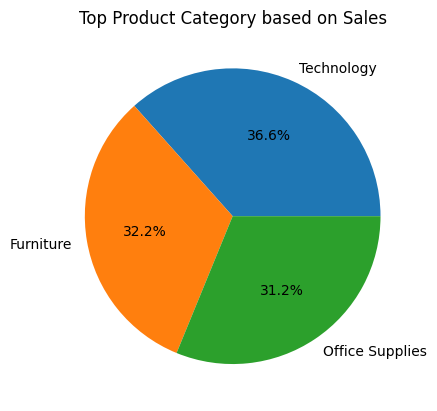

In [61]:
# plottinga pie chart
plt.pie(category_sales['Sales'], labels=category_sales['Category'], autopct='%1.1f%%')

# set labels
plt.title('Top Product Category based on Sales')
plt.show()

In [64]:
# group data by product sub-category vs sales
pdt_subcategory = df.groupby(['Sub-Category'])['Sales'].sum().reset_index()

# sorting in descending order
top_pdt_subcategory = pdt_subcategory.sort_values(by='Sales', ascending=False)

print(top_pdt_subcategory.reset_index(drop=True))

   Sub-Category        Sales
0        Phones  327782.4480
1        Chairs  322822.7310
2       Storage  219343.3920
3        Tables  202810.6280
4       Binders  200028.7850
5      Machines  189238.6310
6   Accessories  164186.7000
7       Copiers  146248.0940
8     Bookcases  113813.1987
9    Appliances  104618.4030
10  Furnishings   89212.0180
11        Paper   76828.3040
12     Supplies   46420.3080
13          Art   26705.4100
14    Envelopes   16128.0460
15       Labels   12347.7260
16    Fasteners    3001.9600


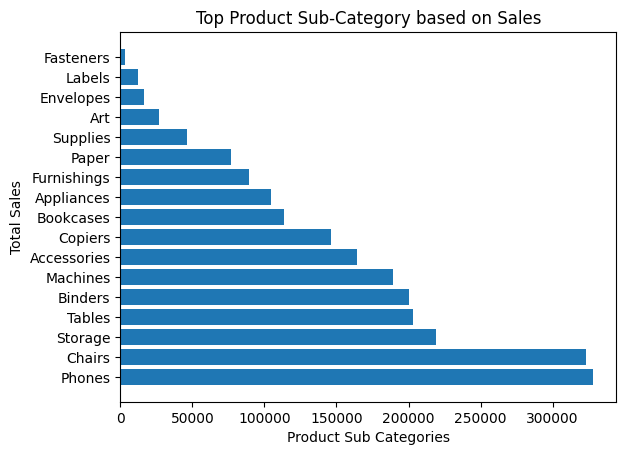

In [66]:
# plotting a horizontal bar graph
plt.barh(top_pdt_subcategory['Sub-Category'], top_pdt_subcategory['Sales'])

# labels
plt.title('Top Product Sub-Category based on Sales')
plt.xlabel('Product Sub Categories')
plt.ylabel('Total Sales')
plt.show()

SALES

In [67]:
# convert order date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# grouping by year and summing the sales per year
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()

# setting new index and renaming the columns
yearly_sales = yearly_sales.reset_index()
yearly_sales = yearly_sales.rename(columns={'Order Date': 'year', 'sales': 'Total Sales'})

print(yearly_sales)

   year        Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192


QUARTERLY SALES

In [78]:
# convert order date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# filter data according to year
year_sales = df[df['Order Date'].dt.year==2018]

# calculate quarterly sales for year 2018
quarterly_sales = year_sales.resample('Q', on='Order Date')['Sales'].sum()

quarterly_sales = quarterly_sales.reset_index()
quarterly_sales = quarterly_sales.rename(columns={'Order Date': 'Quarter', 'Sales': 'Total Sales'})

print('This are the Quarterly sales for 2018')
print(quarterly_sales)

This are the Quarterly sales for 2018
     Quarter  Total Sales
0 2018-03-31  122260.8842
1 2018-06-30  127558.6200
2 2018-09-30  193815.8400
3 2018-12-31  278416.6750


C:\Users\Tamanna Rana\AppData\Local\Temp\ipykernel_1108\299870712.py:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = year_sales.resample('Q', on='Order Date')['Sales'].sum()


MONTHLY SALES TREND FOR A YEAR

In [83]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# filter data according to year
monthly_sales = year_sales.resample('M', on='Order Date')['Sales'].sum()

# rename columns
monthly_sales = monthly_sales.reset_index()
monthly_sales = monthly_sales.rename(columns={'Order Date': 'Month', 'Sales': 'Total Monthly Sales'})

print('This are the Monthly Sales for 2018')
print(monthly_sales)

This are the Monthly Sales for 2018
        Month  Total Monthly Sales
0  2018-01-31           43476.4740
1  2018-02-28           19920.9974
2  2018-03-31           58863.4128
3  2018-04-30           35541.9101
4  2018-05-31           43825.9822
5  2018-06-30           48190.7277
6  2018-07-31           44825.1040
7  2018-08-31           62837.8480
8  2018-09-30           86152.8880
9  2018-10-31           77448.1312
10 2018-11-30          117938.1550
11 2018-12-31           83030.3888


C:\Users\Tamanna Rana\AppData\Local\Temp\ipykernel_1108\3411420923.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = year_sales.resample('M', on='Order Date')['Sales'].sum()
